# Anime Analysis 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#missing_values = ["na", "['na']", "['nan']"]
#df = pd.read_csv('./anime_list.csv', na_values=missing_values, sep=';')
#plt.savefig('plot2.png')

In [3]:
df = pd.read_pickle("anime_df.pkl")
#df.to_pickle("anime_df.pkl")

In [4]:
df.dtypes

Rating          float64
Votes           float64
Title            object
Alt Title        object
Format         category
Episodes        float64
Duration        float64
Start Year     category
End Year       category
Studio           object
Tags             object
Description      object
dtype: object

In [5]:
df.isnull().sum()

Rating         3058
Votes          3058
Title             0
Alt Title      7767
Format            0
Episodes        406
Duration       5434
Start Year      198
End Year       2695
Studio         3987
Tags            364
Description    5609
dtype: int64

### 1) Highest Rated Anime (Finding Commonalities)

In [6]:
top_rated = df.sort_values('Rating', ascending=False).head(100)
not_top_df = df.iloc[100:]
top_rated

Rating     Votes                                              Title  \
0    9.410   73986.0                   Fullmetal Alchemist: Brotherhood   
1    9.356   29247.0                                         your name.   
2    9.334   19592.0                                     A Silent Voice   
3    9.320   11195.0  Haikyuu!! Karasuno High School vs Shiratorizaw...   
4    9.296   18788.0                                 My Hero Academia 3   
5    9.288    2939.0                                  Mob Psycho 100 II   
6    9.274   15322.0                            Haikyuu!! Second Season   
7    9.266    5375.0        Gintama Kanketsu-hen: Yorozuya yo Eien Nare   
8    9.264   29623.0                                 My Hero Academia 2   
9    9.262    6192.0                                     Gintama (2015)   
10   9.256   42599.0                                        Steins;Gate   
11   9.256   35732.0                             Hunter x Hunter (2011)   
12   9.248    1248.0              Gintama.: Shirogane no Tamashii-hen 2   
13   9.246    4144.0                             The Promised Neverland   
14   9.240   59301.0            Code Geass: Lelouch of the Rebellion R2   
15   9.228    2430.0              March Comes in like a Lion 2nd Season   
16   9.222    3497.0                                           Gintama.   
17   9.218    5109.0                      Mushishi Zoku Shou 2nd Season   
18   9.210    1803.0                Gintama.: Shirogane no Tamashii-hen   
19   9.200    9542.0                                           Gintama'   
20   9.198    7238.0                                Gintama': Enchousen   
21   9.196   48807.0                                      One-Punch Man   
22   9.196   38709.0                                Clannad After Story   
23   9.192    2718.0                            Natsume Yuujinchou Roku   
24   9.184    6015.0                                 Mushishi Zoku Shou   
25   9.178   10098.0                                      Made in Abyss   
26   9.176   21464.0                                      Wolf Children   
27   9.164   71965.0                                      Spirited Away   
28   9.162    1359.0                        I Want to Eat Your Pancreas   
29   9.158    5336.0                      The Rising of the Shield Hero   
..     ...       ...                                                ...   
70   9.046   36568.0                                   My Hero Academia   
71   9.044    7486.0                              No Game No Life: Zero   
72   9.038    8730.0                              The Boy and the Beast   
73   9.036    9283.0                                         Bakuman. 3   
74   9.036    9497.0                            Zoku Natsume Yuujinchou   
75   9.034   17633.0                              Kuroko's Basketball 2   
76   9.032    3090.0                      Legend of the Galactic Heroes   
77   9.030    9754.0                         Food Wars! The Third Plate   
78   9.026    1654.0                           Quan Zhi Gao Shou (2018)   
79   9.020   11611.0          Steins;Gate Movie: Load Region of Deja Vu   
80   9.020    6473.0      Food Wars! The Third Plate: Totsuki Train Arc   
81   9.014   33266.0                               Parasyte -the maxim-   
82   9.012    6001.0  Kara no Kyoukai Movie 7: Satsujin Kousatsu (Pa...   
84   9.010     848.0                   Natsume Yuujinchou Roku Specials   
83   9.010    3773.0                                  Fairy Tail (2018)   
85   9.008     128.0                               Zoku Owarimonogatari   
86   9.008   10067.0                         Attack on Titan 3rd Season   
87   9.006  116212.0                                         Death Note   
88   9.004    3270.0                                     Major Season 5   
89   9.002   10175.0  The Seven Deadly Sins: Revival of The Commandm...   
90   9.000    5506.0   JoJo's Bizarre Adventure: Diamond is Unbreakable   
91   8.996   25189.0         

#### i) Votes

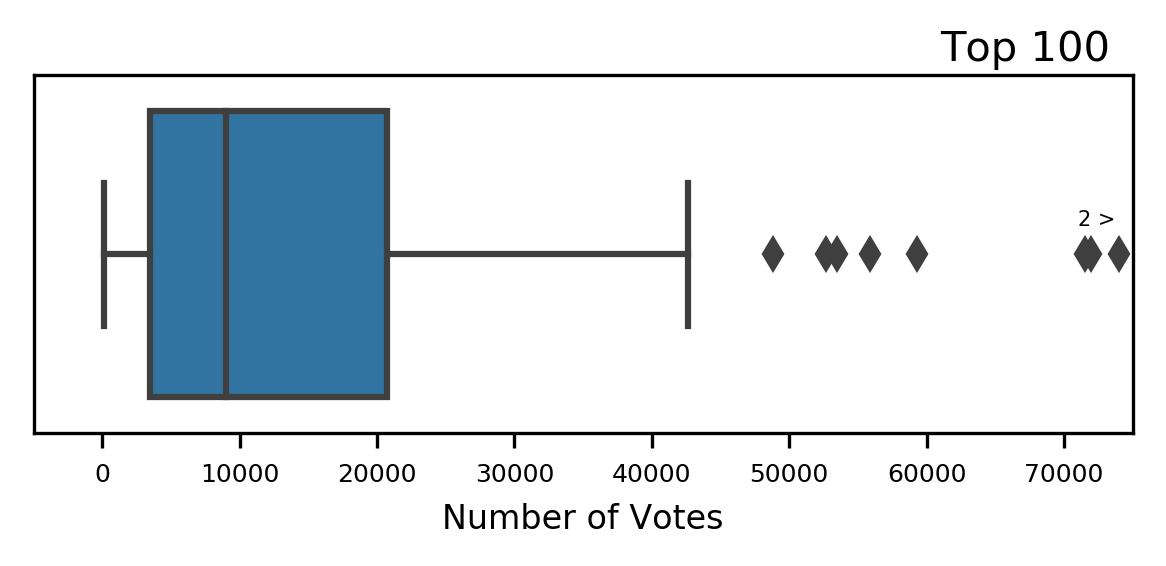

In [7]:
ax = plt.subplots(figsize=(4,2),dpi=300)
ax = sns.boxplot(x='Votes', data=top_rated)
ax.set_yticks([])
#_ = ax.set_title('Distribution of Votes', fontsize=10)
ax.set_xlabel("Number of Votes",fontsize=8)
ax.tick_params(labelsize=6)
plt.text(x = 61000, y = -0.54, s = "Top 100", size = 10)

outliers = len(top_rated.loc[(top_rated['Votes'] > 75000)].index)
plt.text(x = 71000, y = -0.08, s = str(outliers) + " >", size = 5)

plt.xlim(-5000, 75000)
plt.tight_layout()
#plt.savefig('images/top_rated_votes.png')

In [8]:
top_rated['Votes'].agg(['min', 'median', 'mean', 'max'])

min          128.00
median      9040.50
mean       16836.18
max       116212.00
Name: Votes, dtype: float64

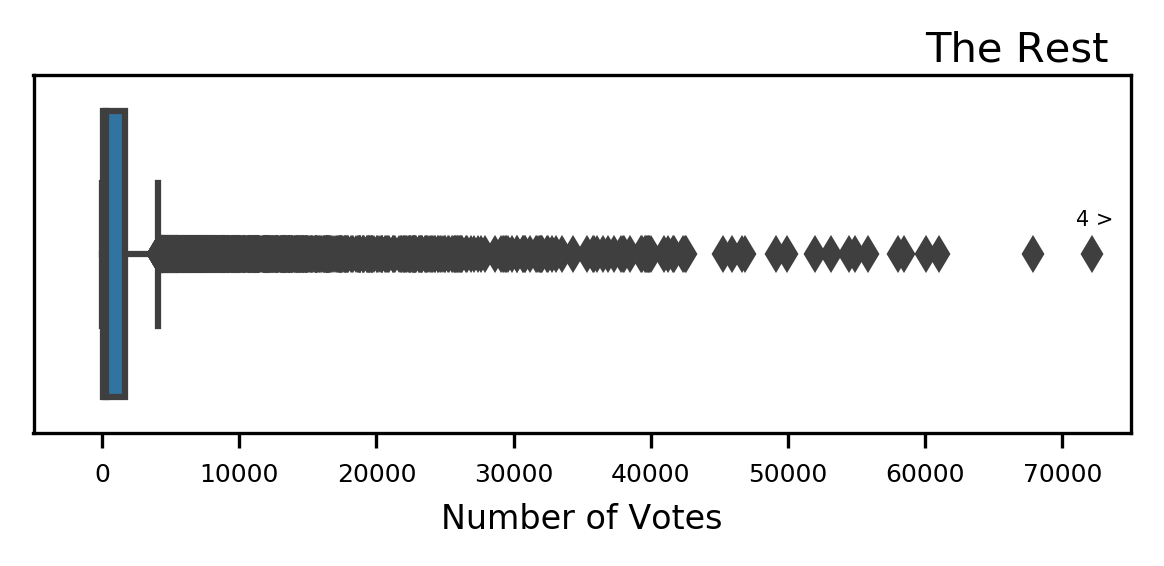

In [9]:
ax = plt.subplots(figsize=(4,2),dpi=300)
ax = sns.boxplot(x='Votes', data=not_top_df)
ax.set_yticks([])
#_ = ax.set_title('Distribution of Votes', fontsize=10)
ax.set_xlabel("Number of Votes",fontsize=8)
ax.tick_params(labelsize=6)
plt.text(x = 60000, y = -0.54, s = "The Rest", size = 10)

outliers = len(not_top_df.loc[(not_top_df['Votes'] > 75000)].index)
plt.text(x = 71000, y = -0.08, s = str(outliers) + " >", size = 5)

plt.xlim(-5000, 75000)
plt.tight_layout()
#plt.savefig('images/not_top_votes.png')

In [10]:
not_top_df['Votes'].agg(['min', 'median', 'mean', 'max'])

min          10.000000
median      309.000000
mean       2063.929648
max       86084.000000
Name: Votes, dtype: float64

#### ii) Format

In [11]:
top_rated.groupby('Format')['Title'].count().sort_values(ascending=False)

Format
TV             67
Movie          21
OVA             6
TV Special      3
Web             2
DVD Special     1
Other           0
Music Video     0
Name: Title, dtype: int64

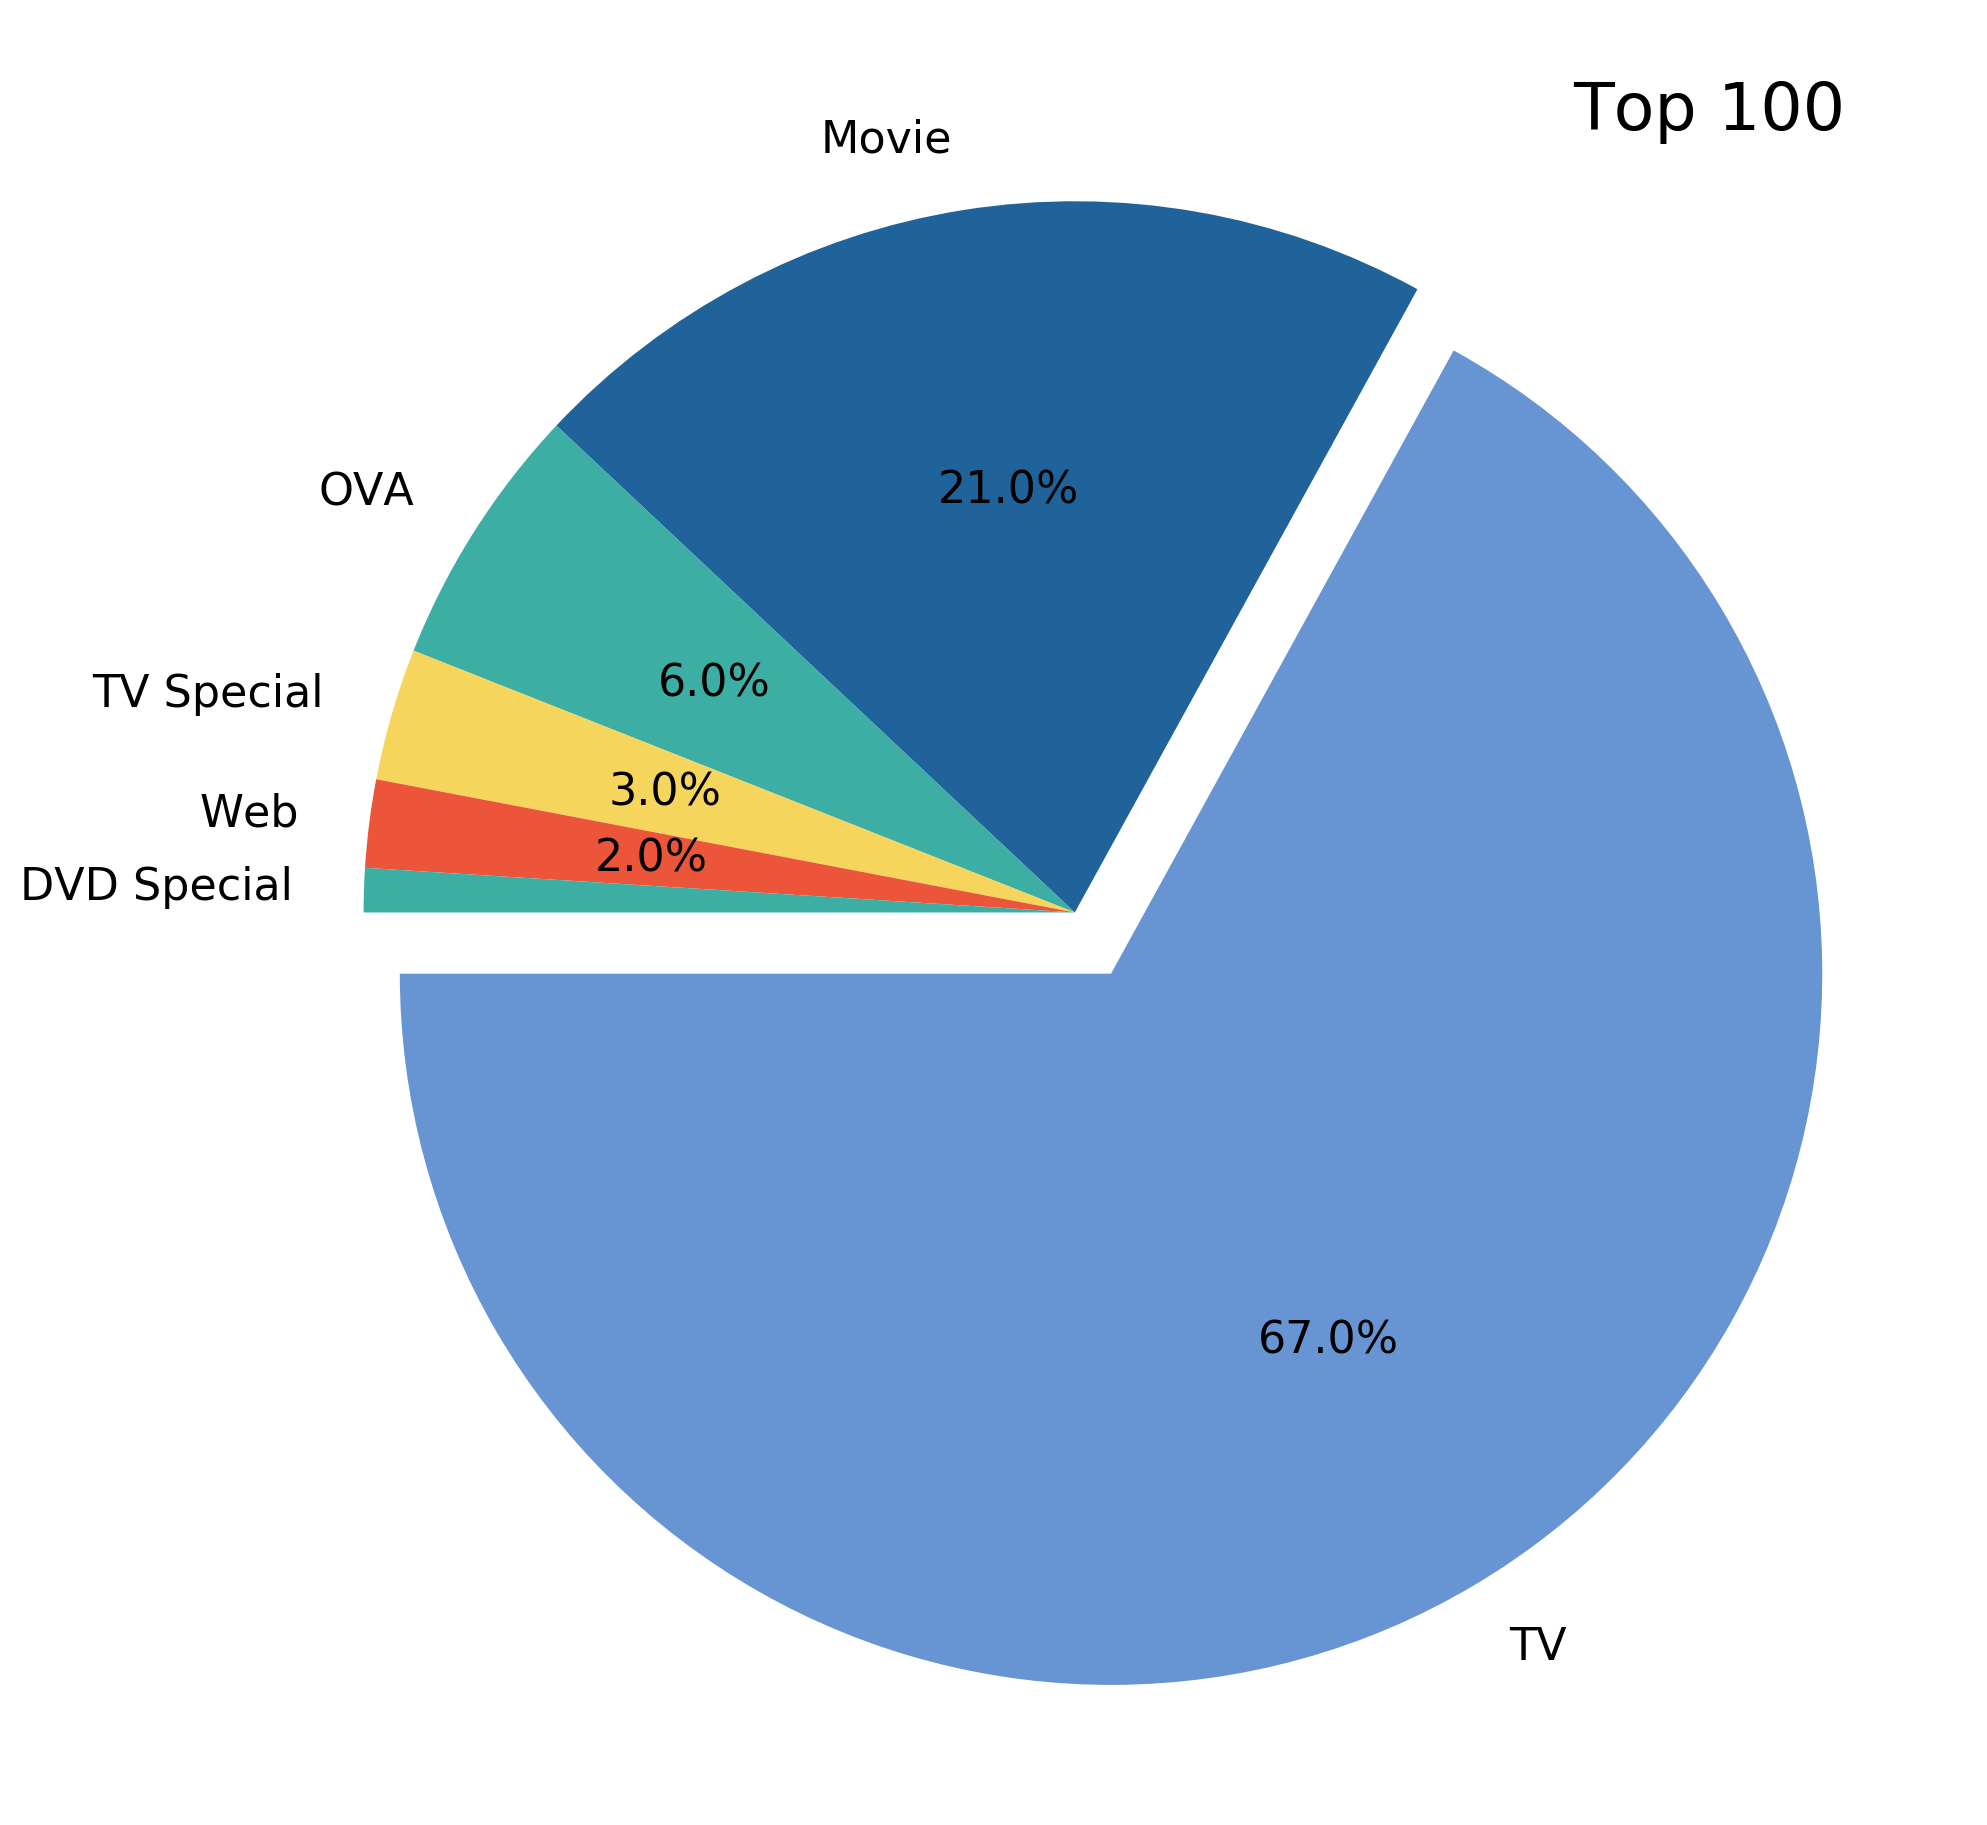

In [69]:
ax = plt.subplots(figsize=(2,1),dpi=200)
explode = [0.1, 0, 0, 0, 0, 0, 0, 0]
colors = ['#6795D3', '#20639B', '#3CAEA3', '#F6D55C', '#ED553B', '#3CAEA3']
ax = top_rated.groupby(['Format'])['Title'].count().sort_values(ascending=False).plot(kind='pie', explode=explode, autopct=lambda x: '{p:.1f}%'.format(p=x) if x>1 else '', shadow=False, figsize=(10, 10), fontsize=16, startangle=180, colors=colors)
ax.set_ylabel('')
plt.text(x = 0.7, y = 1.1, s = "Top 100", size = 24)
plt.tight_layout()
#plt.savefig('images/top_rated_format.png')

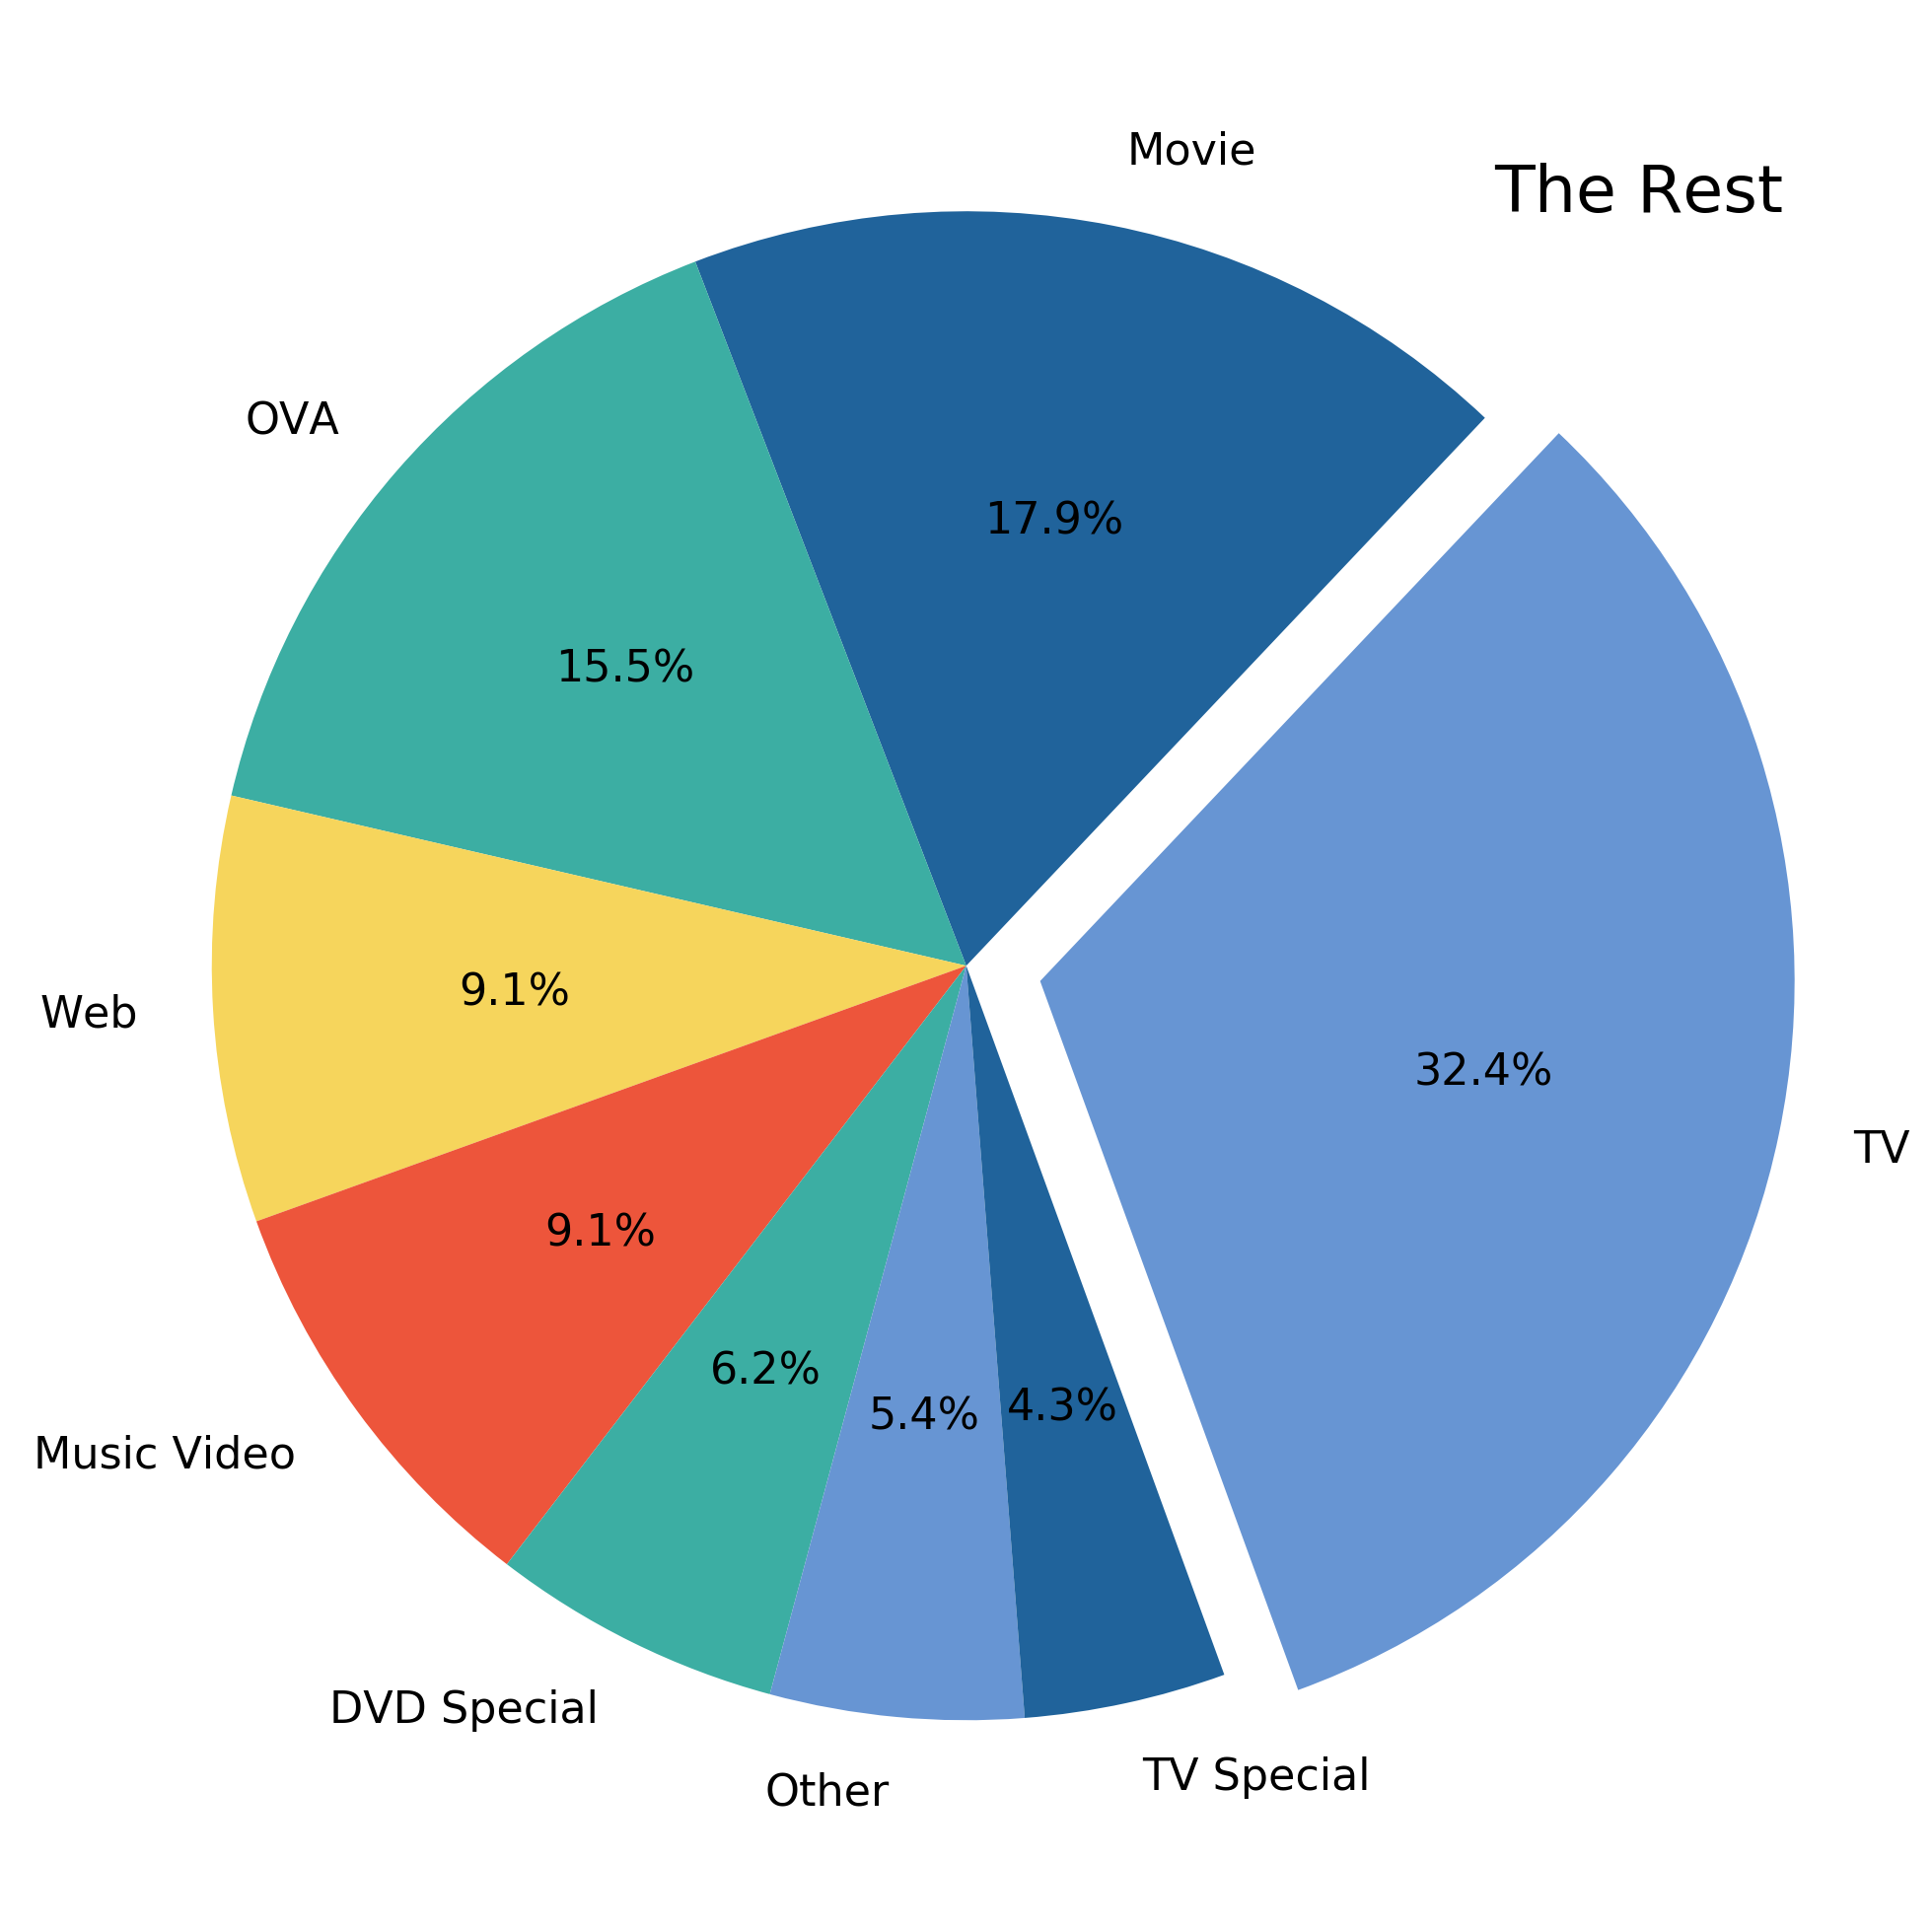

In [76]:
ax = plt.subplots(figsize=(2,1),dpi=200)
explode = [0.1, 0, 0, 0, 0, 0, 0, 0]
colors = ['#6795D3', '#20639B', '#3CAEA3', '#F6D55C', '#ED553B', '#3CAEA3']
ax = not_top_df.groupby(['Format'])['Title'].count().sort_values(ascending=False).plot(kind='pie', explode=explode, autopct=lambda x: '{p:.1f}%'.format(p=x) if x>0.9 else '', shadow=False, figsize=(10, 10), fontsize=16, startangle=290, colors=colors)
ax.set_ylabel('')
plt.text(x = 0.7, y = 1, s = "The Rest", size = 24)
plt.tight_layout()
#plt.savefig('images/not_top_format.png')

#### iii) Episodes

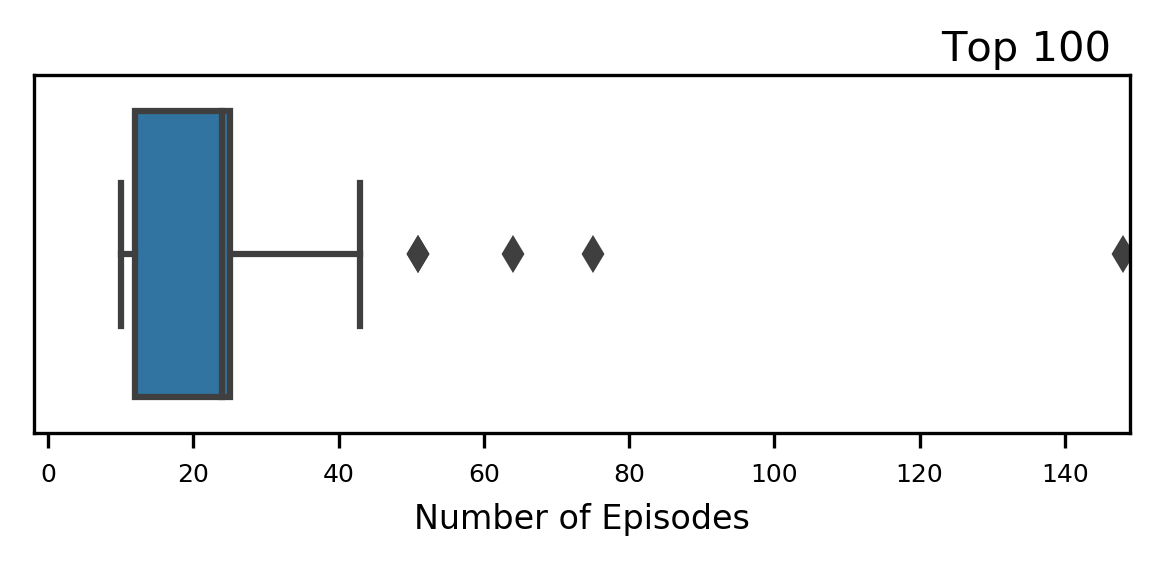

In [12]:
ax = plt.subplots(figsize=(4,2),dpi=300)
ax = sns.boxplot(x='Episodes', data=top_rated.loc[top_rated['Format'] == 'TV'])
ax.set_yticks([])
#_ = ax.set_title('Distribution of Votes', fontsize=10)
ax.set_xlabel("Number of Episodes",fontsize=8)
ax.tick_params(labelsize=6)
plt.text(x = 123, y = -0.54, s = "Top 100", size = 10)
plt.xlim(-2, 149)
plt.tight_layout()
#plt.savefig('images/top_rated_episodes.png')

In [13]:
print(top_rated.loc[top_rated['Format'] == 'TV']['Episodes'].agg(['min', 'median', 'mean', 'max']))

min        10.000000
median     24.000000
mean       23.492537
max       148.000000
Name: Episodes, dtype: float64


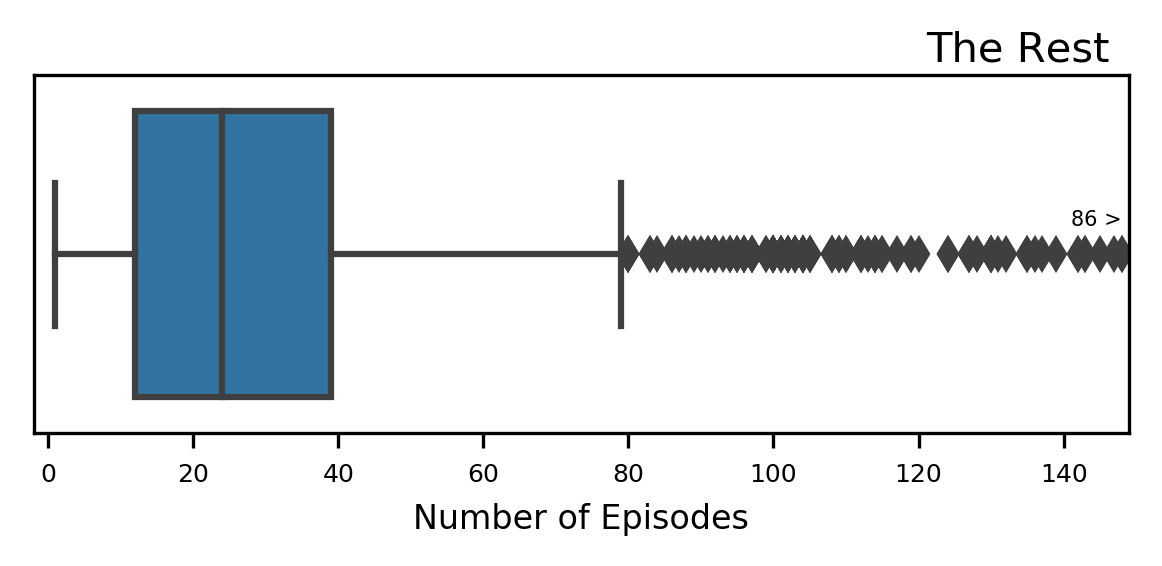

In [14]:
ax = plt.subplots(figsize=(4,2),dpi=300)
ax = sns.boxplot(x='Episodes', data=not_top_df.loc[not_top_df['Format'] == 'TV'])
ax.set_yticks([])
#_ = ax.set_title('Distribution of Votes', fontsize=10)
ax.set_xlabel("Number of Episodes",fontsize=8)
ax.tick_params(labelsize=6)
plt.text(x = 121, y = -0.54, s = "The Rest", size = 10)

outliers = len(not_top_df.loc[(not_top_df['Format'] == 'TV') & (not_top_df['Episodes'] > 149)].index)
plt.text(x = 141, y = -0.08, s = str(outliers) + " >", size = 5)

plt.xlim(-2, 149)
plt.tight_layout()
#plt.savefig('images/not_top_episodes.png')

In [75]:
not_top_df.loc[not_top_df['Format'] == 'TV']['Episodes'].agg(['min', 'median', 'mean', 'max'])

min          1.000000
median      24.000000
mean        36.664433
max       2484.000000
Name: Episodes, dtype: float64

#### iv) Duration

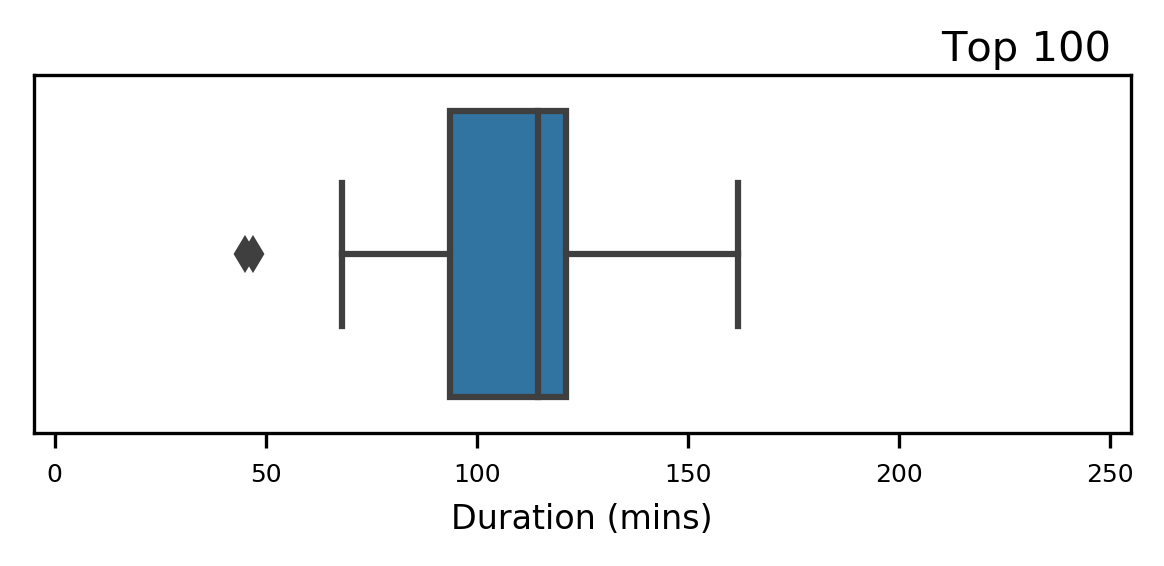

In [15]:
ax = plt.subplots(figsize=(4,2),dpi=300)
ax = sns.boxplot(x='Duration', data=top_rated.loc[top_rated['Format'] == 'Movie'])
ax.set_yticks([])
#_ = ax.set_title('Distribution of Votes', fontsize=10)
ax.set_xlabel("Duration (mins)",fontsize=8)
ax.tick_params(labelsize=6)
plt.text(x = 210, y = -0.54, s = "Top 100", size = 10)
plt.xlim(-5, 255)
plt.tight_layout()
#plt.savefig('images/top_rated_duration.png')

In [16]:
top_rated.loc[top_rated['Format'] == 'Movie']['Duration'].agg(['min', 'median', 'mean', 'max'])

min        45.00
median    114.50
mean      107.65
max       162.00
Name: Duration, dtype: float64

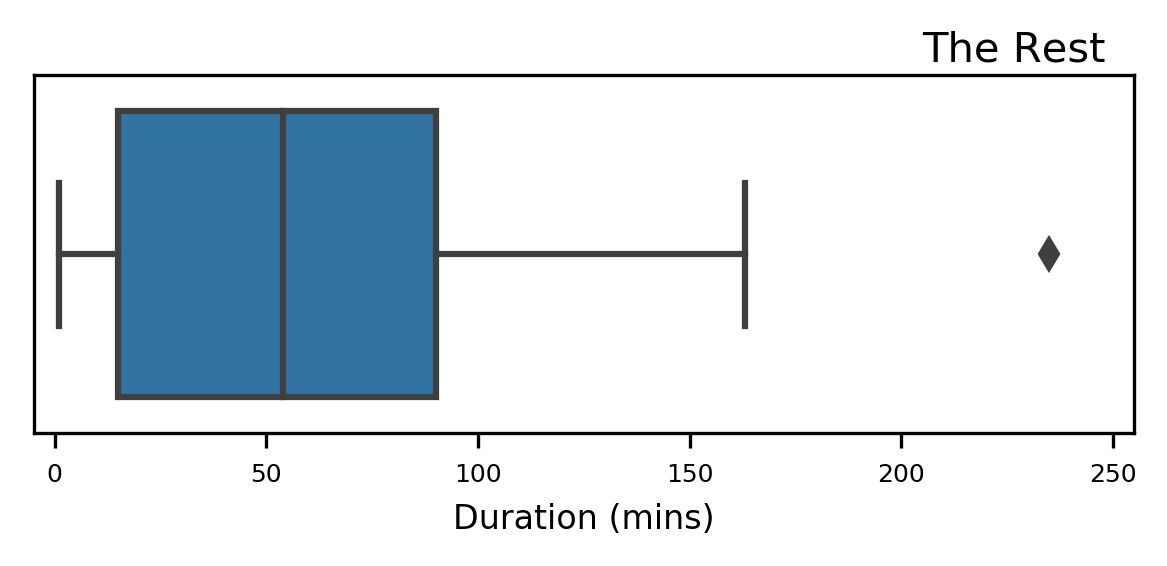

In [17]:
ax = plt.subplots(figsize=(4,2),dpi=300)
ax = sns.boxplot(x='Duration', data=not_top_df.loc[not_top_df['Format'] == 'Movie'])
ax.set_yticks([])
#_ = ax.set_title('Distribution of Votes', fontsize=10)
ax.set_xlabel("Duration (mins)",fontsize=8)
ax.tick_params(labelsize=6)
plt.text(x = 205, y = -0.54, s = "The Rest", size = 10)
plt.xlim(-5, 255)
plt.tight_layout()
#plt.savefig('images/not_top_duration.png')

In [18]:
not_top_df.loc[not_top_df['Format'] == 'Movie']['Duration'].agg(['min', 'median', 'mean', 'max'])

min         1.000000
median     54.000000
mean       55.167621
max       235.000000
Name: Duration, dtype: float64

### 1. How does the duration of movies affect their rating?

In [19]:
df.loc[df['Format'] == 'Movie'].corr()

Rating     Votes  Episodes  Duration
Rating    1.000000  0.369323       NaN  0.674047
Votes     0.369323  1.000000       NaN  0.291978
Episodes       NaN       NaN       NaN       NaN
Duration  0.674047  0.291978       NaN  1.000000

#### Strong correlation!!

In [20]:
df.loc[df['Format'] == 'Movie', 'Duration'].fillna(value=mean_dur).index

NameError: name 'mean_dur' is not defined

0.6740468363640132


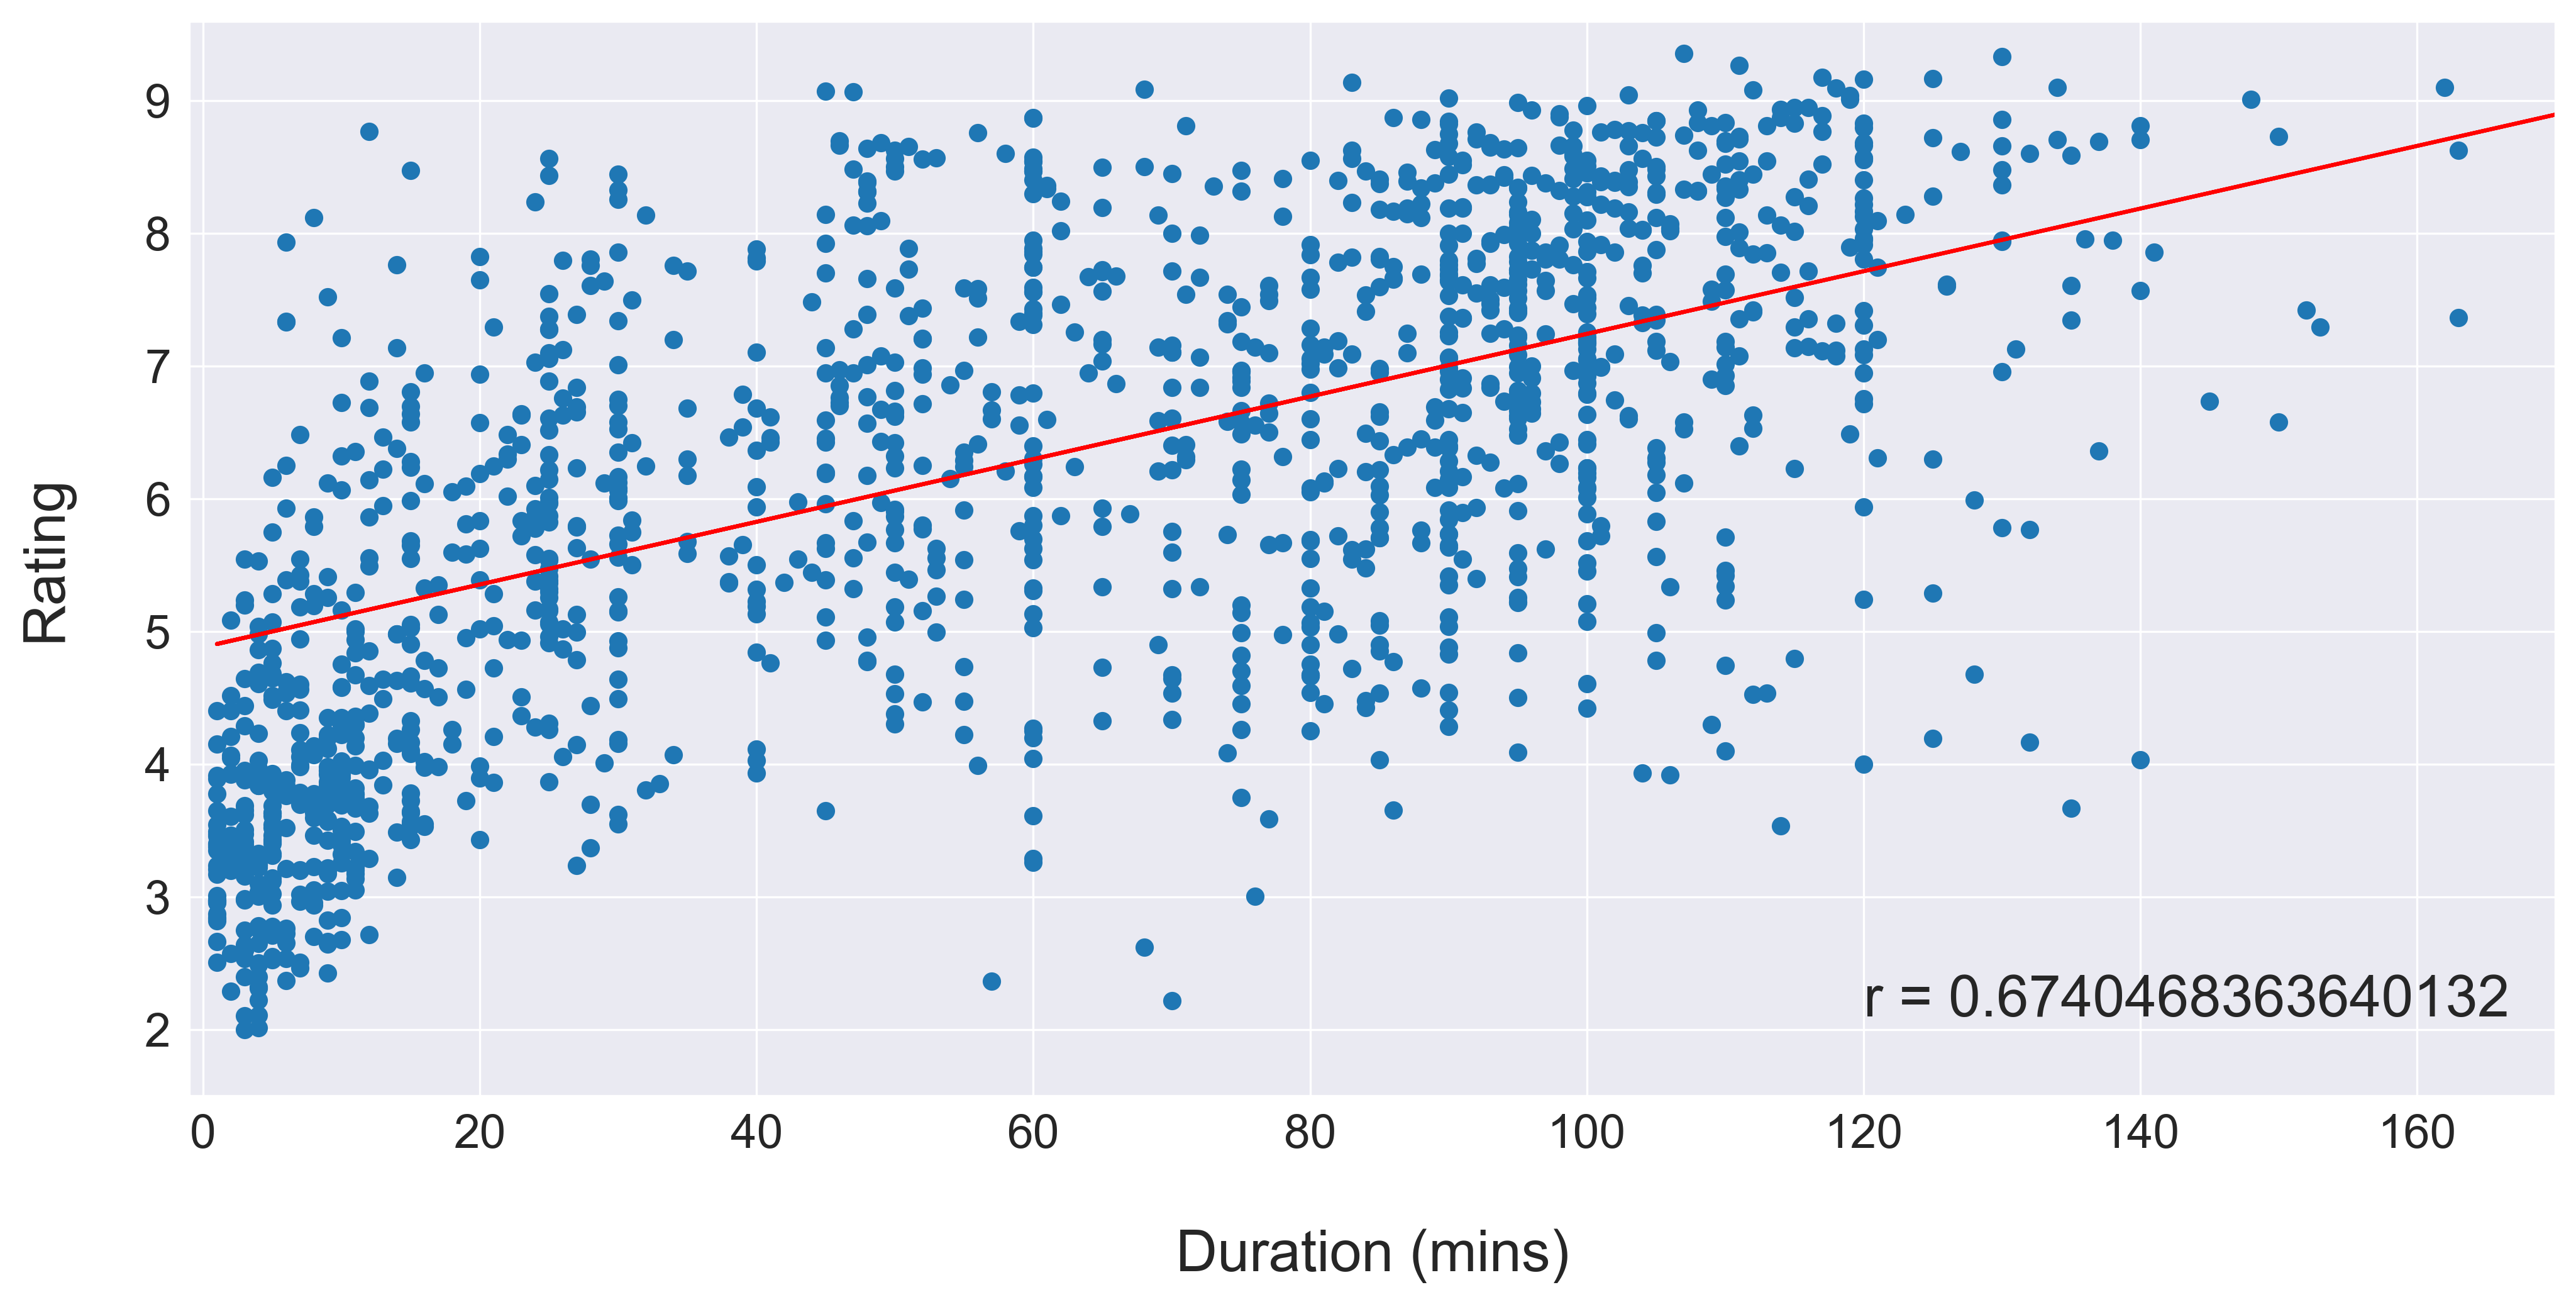

In [21]:
sns.set_style("darkgrid")
plt.subplots(figsize=(14,7),dpi=300)


plt.scatter(df.loc[df['Format'] == 'Movie', 'Duration'], df.loc[df['Format'] == 'Movie', 'Rating'])
m = df.loc[df['Format'] == 'Movie', 'Duration'].corr(df.loc[df['Format'] == 'Movie', 'Rating'])

linear_regressor = LinearRegression()  # create object for the class
mean_dur = df.loc[df['Format'] == 'Movie', 'Duration'].mean()
mean_rat = df.loc[df['Format'] == 'Movie', 'Rating'].mean()
linear_regressor.fit(df.loc[df['Format'] == 'Movie', 'Duration'].fillna(value=mean_dur).values.reshape(-1, 1), df.loc[df['Format'] == 'Movie', 'Rating'].fillna(value=mean_rat).values.reshape(-1, 1))  # perform linear regression
Y_pred = linear_regressor.predict(df.loc[df['Format'] == 'Movie', 'Duration'].fillna(value=mean_dur).values.reshape(-1, 1))  # make predictions

plt.plot(df.loc[df['Format'] == 'Movie', 'Duration'].fillna(value=mean_dur).values.reshape(-1, 1), Y_pred, color='red')
plt.xlim(-1, 170)
plt.ylim(1.5, 9.6)
plt.xlabel('\nDuration (mins)', fontsize=22)
plt.ylabel('Rating\n', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.text(x = 120, y = 2.1, s = "r = " + str(m), size = 22)

print(m)
plt.tight_layout()
#plt.savefig('images/duration_rating_correlation.png')

#### v) Studio

In [56]:
def contains (col, elems, dataframe):
    booleans = []
    for tags in dataframe[col]:
        exists = True
        for item in elems:
            if type(tags) == float:
                exists = False
            elif item not in tags:
                exists = False
        if type(tags) == float:
            booleans.append(False)                   
        elif exists:
            booleans.append(True)
        else:
            booleans.append(False)
    return booleans

In [57]:
def listItems(col):
    uniq = []
    for row in col:
        if type(row) != float:
            for each in row:
                if each not in uniq:
                    uniq.append(each)
    return uniq

In [58]:
def arrayColUniqDfCreator(dataframe, col):
    uniq = listItems(dataframe[col])
    uniq_count = {item: 0 for item in uniq}

    for row in dataframe[col]:
        if type(row) != float:
            for item in row:
                uniq_count[item] += 1

    item_list = list(uniq_count.keys())
    count_list = list(uniq_count.values())

    rating_list = []
    for each in item_list:
        rating_list.append(dataframe.loc[np.array(contains(col, [each], dataframe)),'Rating'].mean())

    return pd.DataFrame(list(zip(item_list, rating_list, count_list)), columns=[col, 'Rating', 'Count'])
    
studio_df = arrayColUniqDfCreator(top_rated, 'Studio')

In [18]:
studio_df.sort_values('Count', ascending=False).head()

Studio    Rating  Count
7     MADHOUSE  9.082400     10
4      Sunrise  9.153429      7
10     Artland  9.090857      7
9        Shaft  9.114333      6
23  J.C. Staff  9.035333      6

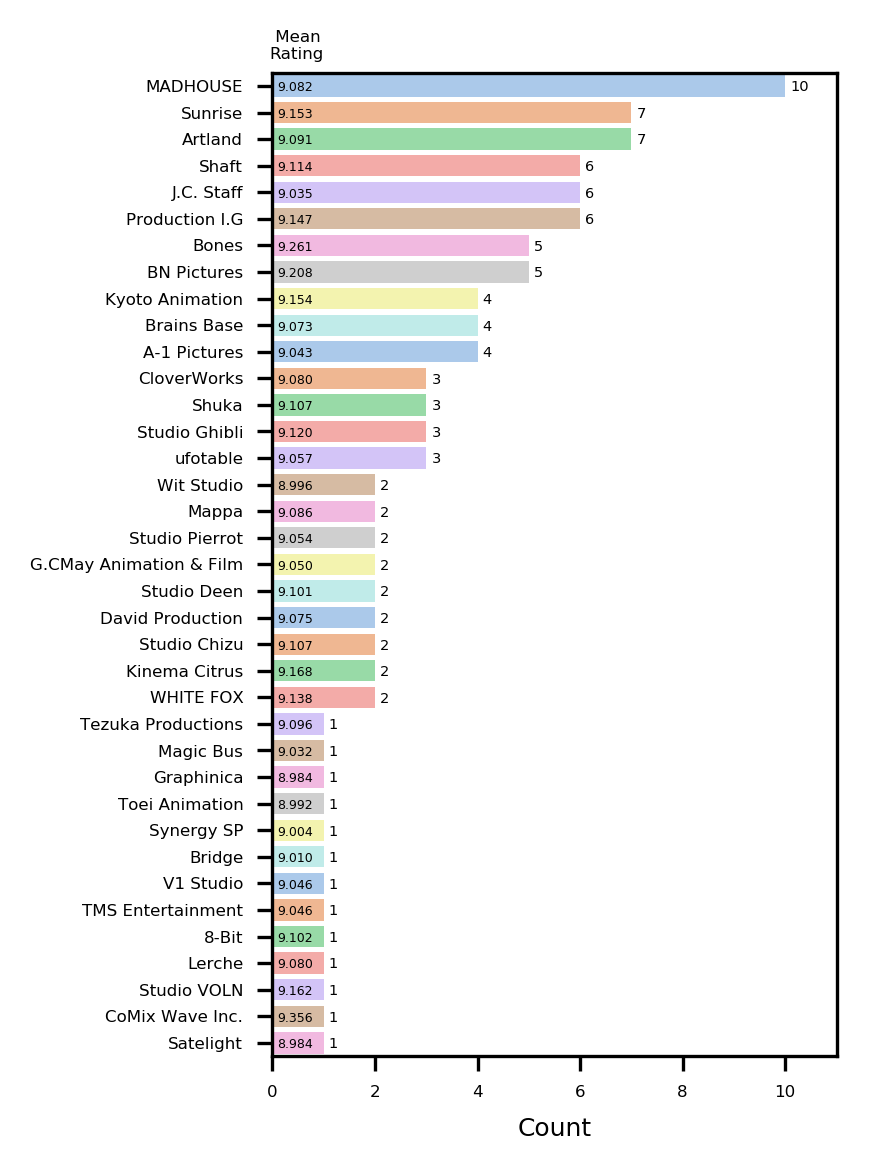

In [20]:
ax = plt.subplots(figsize=(3,4),dpi=300)
ax = sns.barplot(y='Studio', x='Count', data=studio_df.sort_values('Count', ascending=False), palette='pastel')
ax.set_xlabel("Count",fontsize=6)
ax.set_ylabel("",fontsize=6)
ax.tick_params(labelsize=4)
plt.xlim(0, 11)

rating = list(studio_df.sort_values('Count', ascending=False)['Rating'])
count = list(studio_df.sort_values('Count', ascending=False)['Count'])

plt.text(x = -0.05, y = -1, s = " Mean\nRating", size = 4)

for i in range(len(count)):
    plt.text(x = 0.1 , y = i+0.2, s = "{0:.3f}".format(round(rating[i], 3)), size = 3)
    plt.text(x = count[i]+0.1, y = i+0.2, s = count[i], size = 3.5)
    
plt.tight_layout()
#plt.savefig('images/top_rated_studio_count.png')

#### vi) Year

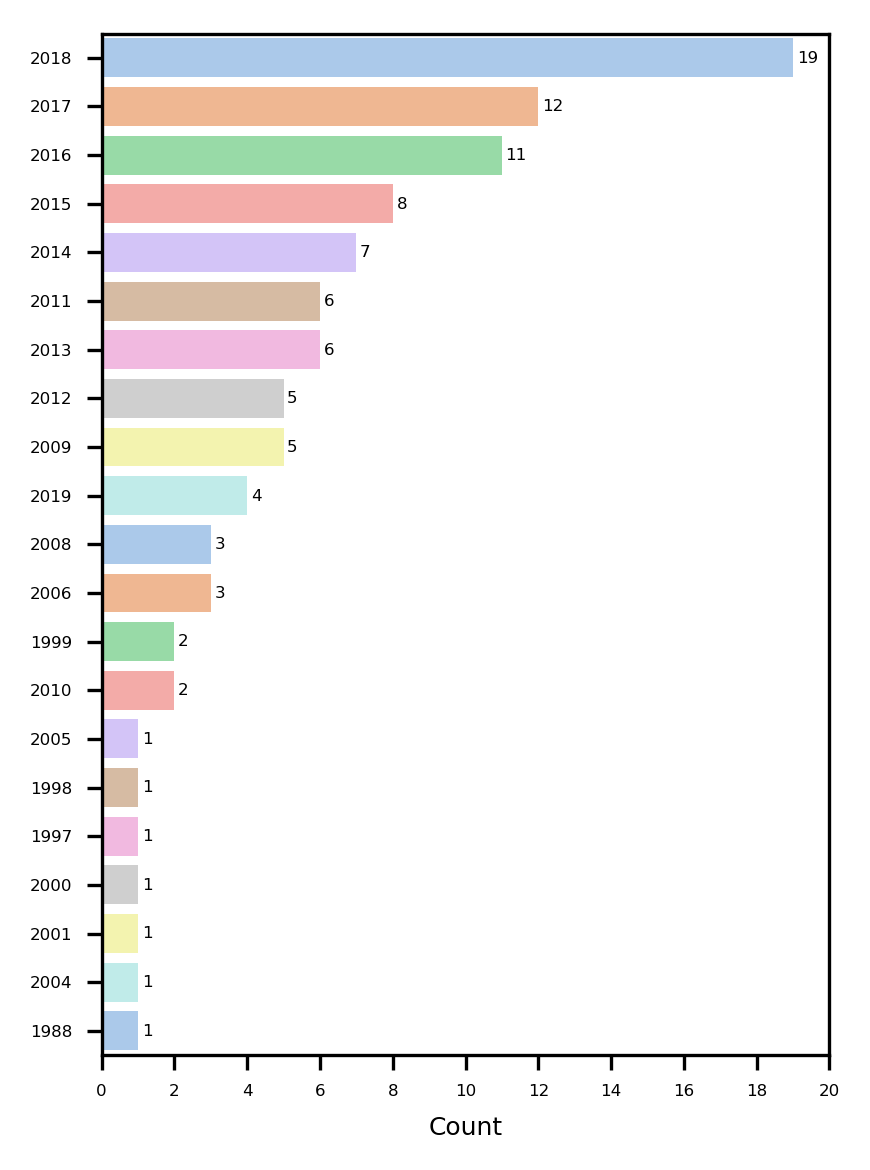

In [34]:
start_year_df = pd.DataFrame([[str(i), int(v)] for i, v in top_rated['Start Year'].value_counts().items() if v != 0], 
                        columns=['Year', 'Count'])

ax = plt.subplots(figsize=(3,4),dpi=300)
ax = sns.barplot(x='Count', y='Year', data=start_year_df, palette='pastel', orient='h', order=[str(i) for i, v in top_rated['Start Year'].value_counts().items() if v != 0])
ax.set_xlabel("Count",fontsize=6)
ax.set_ylabel("",fontsize=6)
ax.tick_params(labelsize=4)
ax.set_xlim(0, 20)

from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

count = list(start_year_df.sort_values('Count', ascending=False)['Count'])

for i in range(len(count)):
    plt.text(x = count[i]+0.1, y = i+0.1, s = count[i], size = 4)

plt.tight_layout()
#plt.savefig('images/top_rated_start_year_count.png')

#### vii) Tags

In [89]:
tags_df = arrayColUniqDfCreator(top_rated, 'Tags')
all_tags_df = arrayColUniqDfCreator(not_top_df, 'Tags')

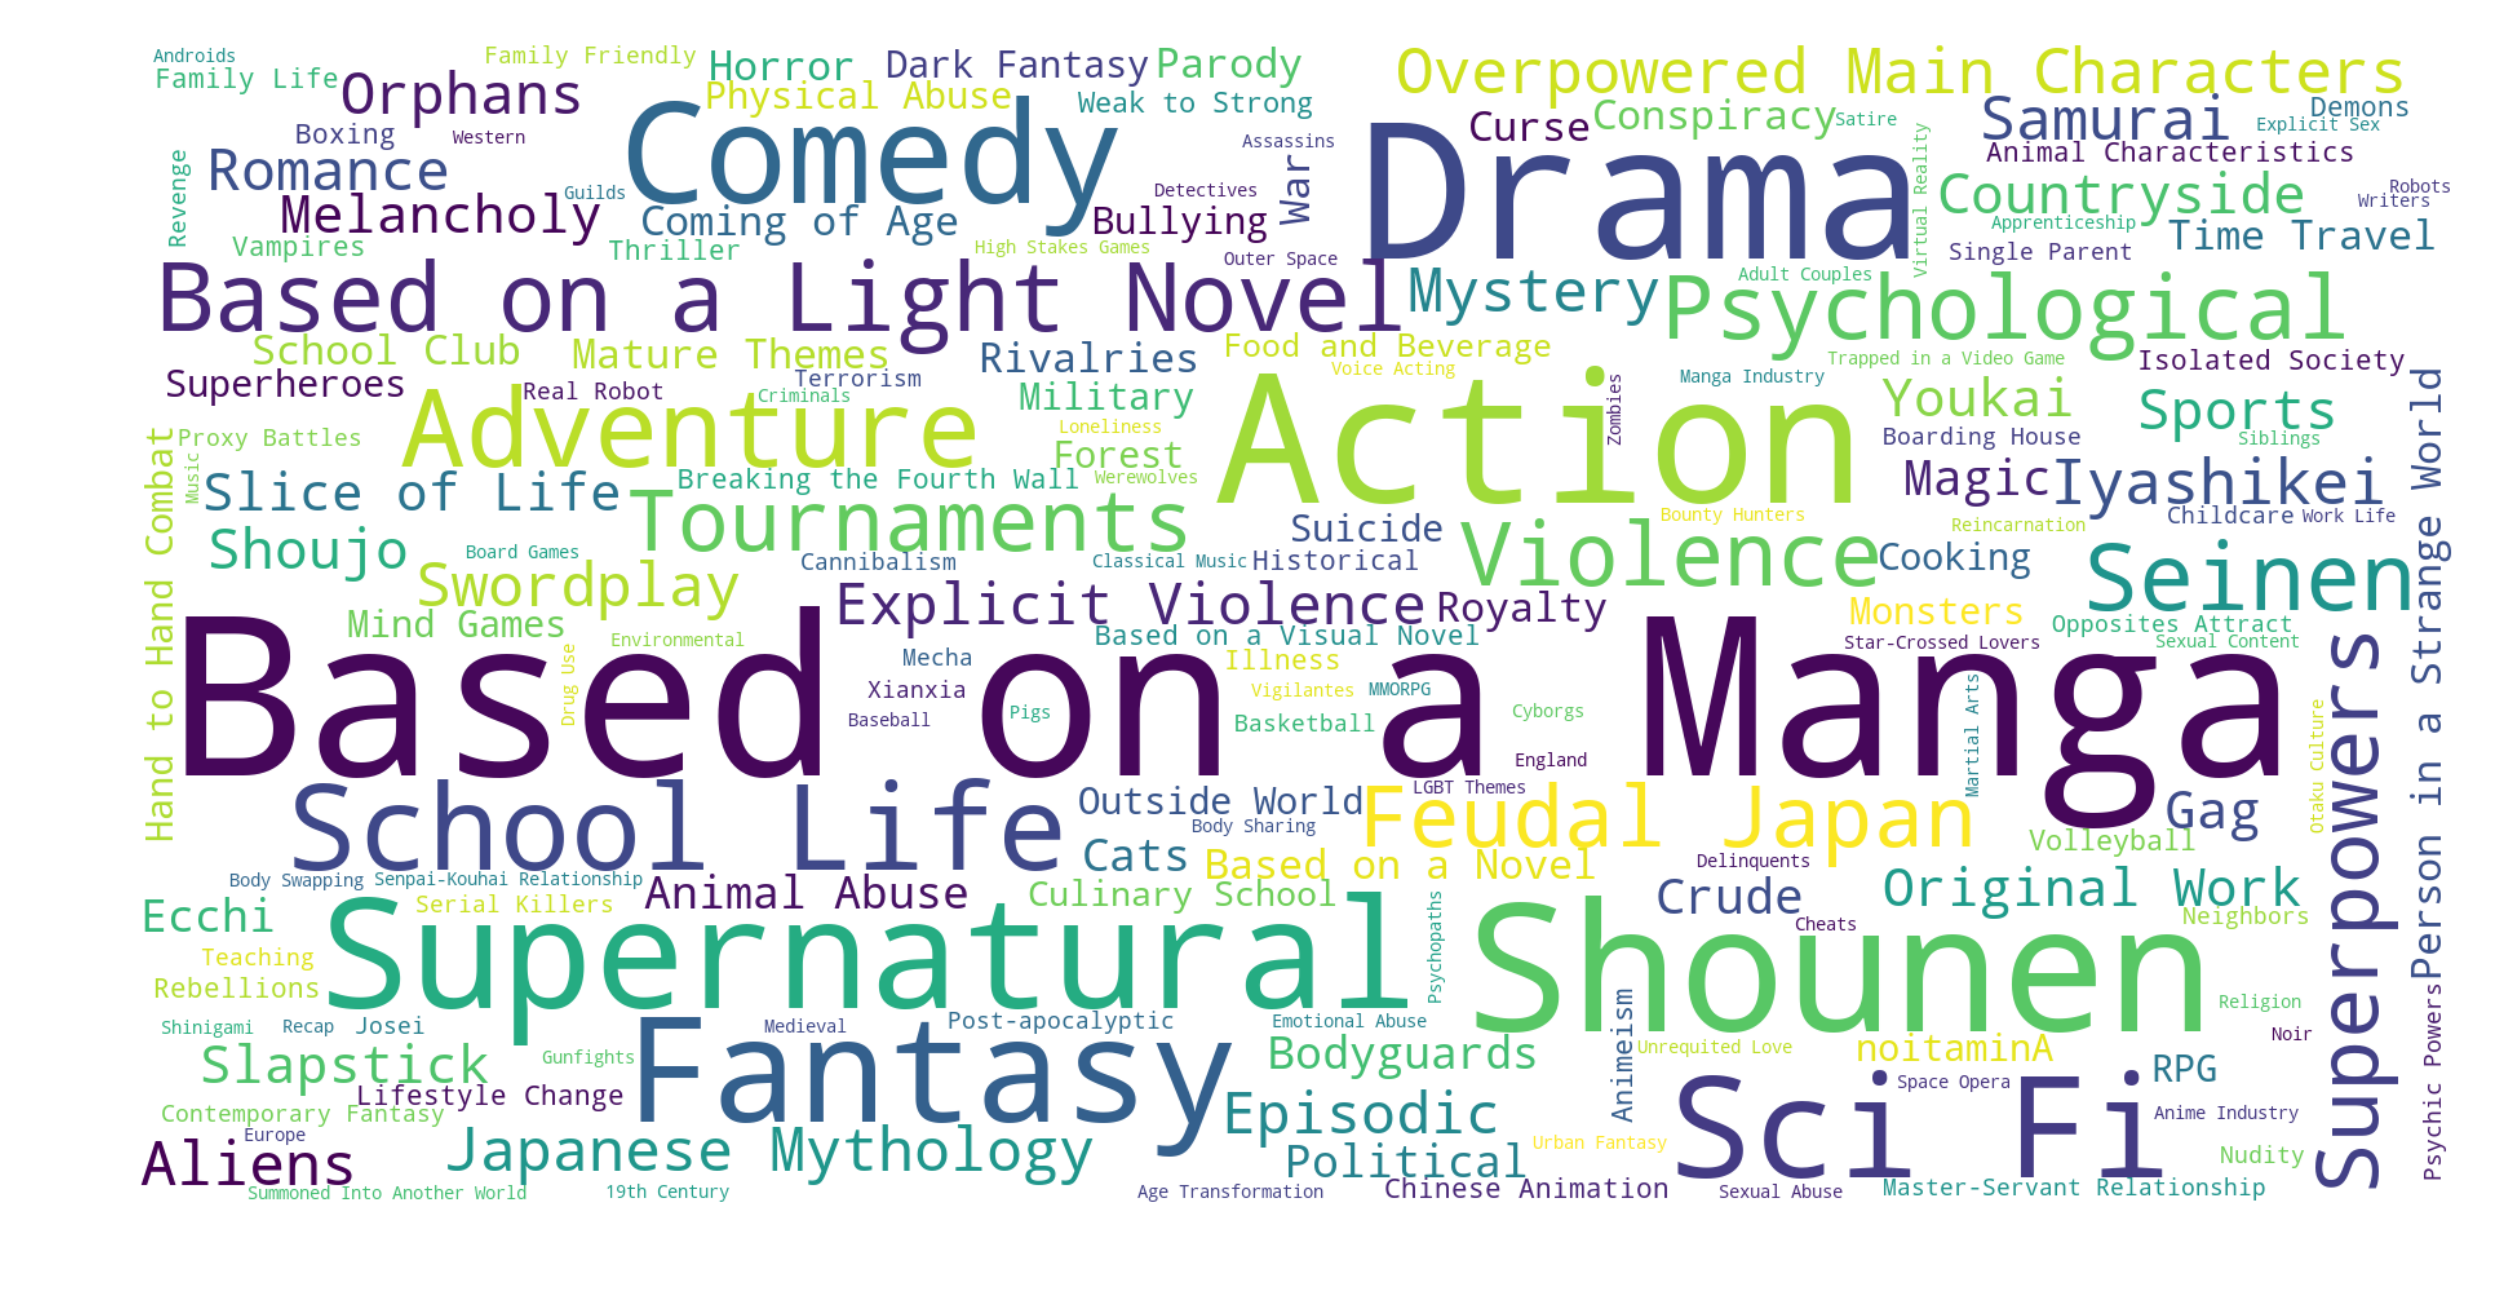

In [90]:
wordcount = pd.Series(tags_df['Count'].values,index=tags_df['Tags']).to_dict()

from wordcloud import WordCloud
wc = WordCloud(background_color="white", width=1800, height=900).generate_from_frequencies(wordcount)
plt.figure(figsize=(10,12),dpi=300)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
#wc.to_file('images/top_rated_tags_wordcloud.png')

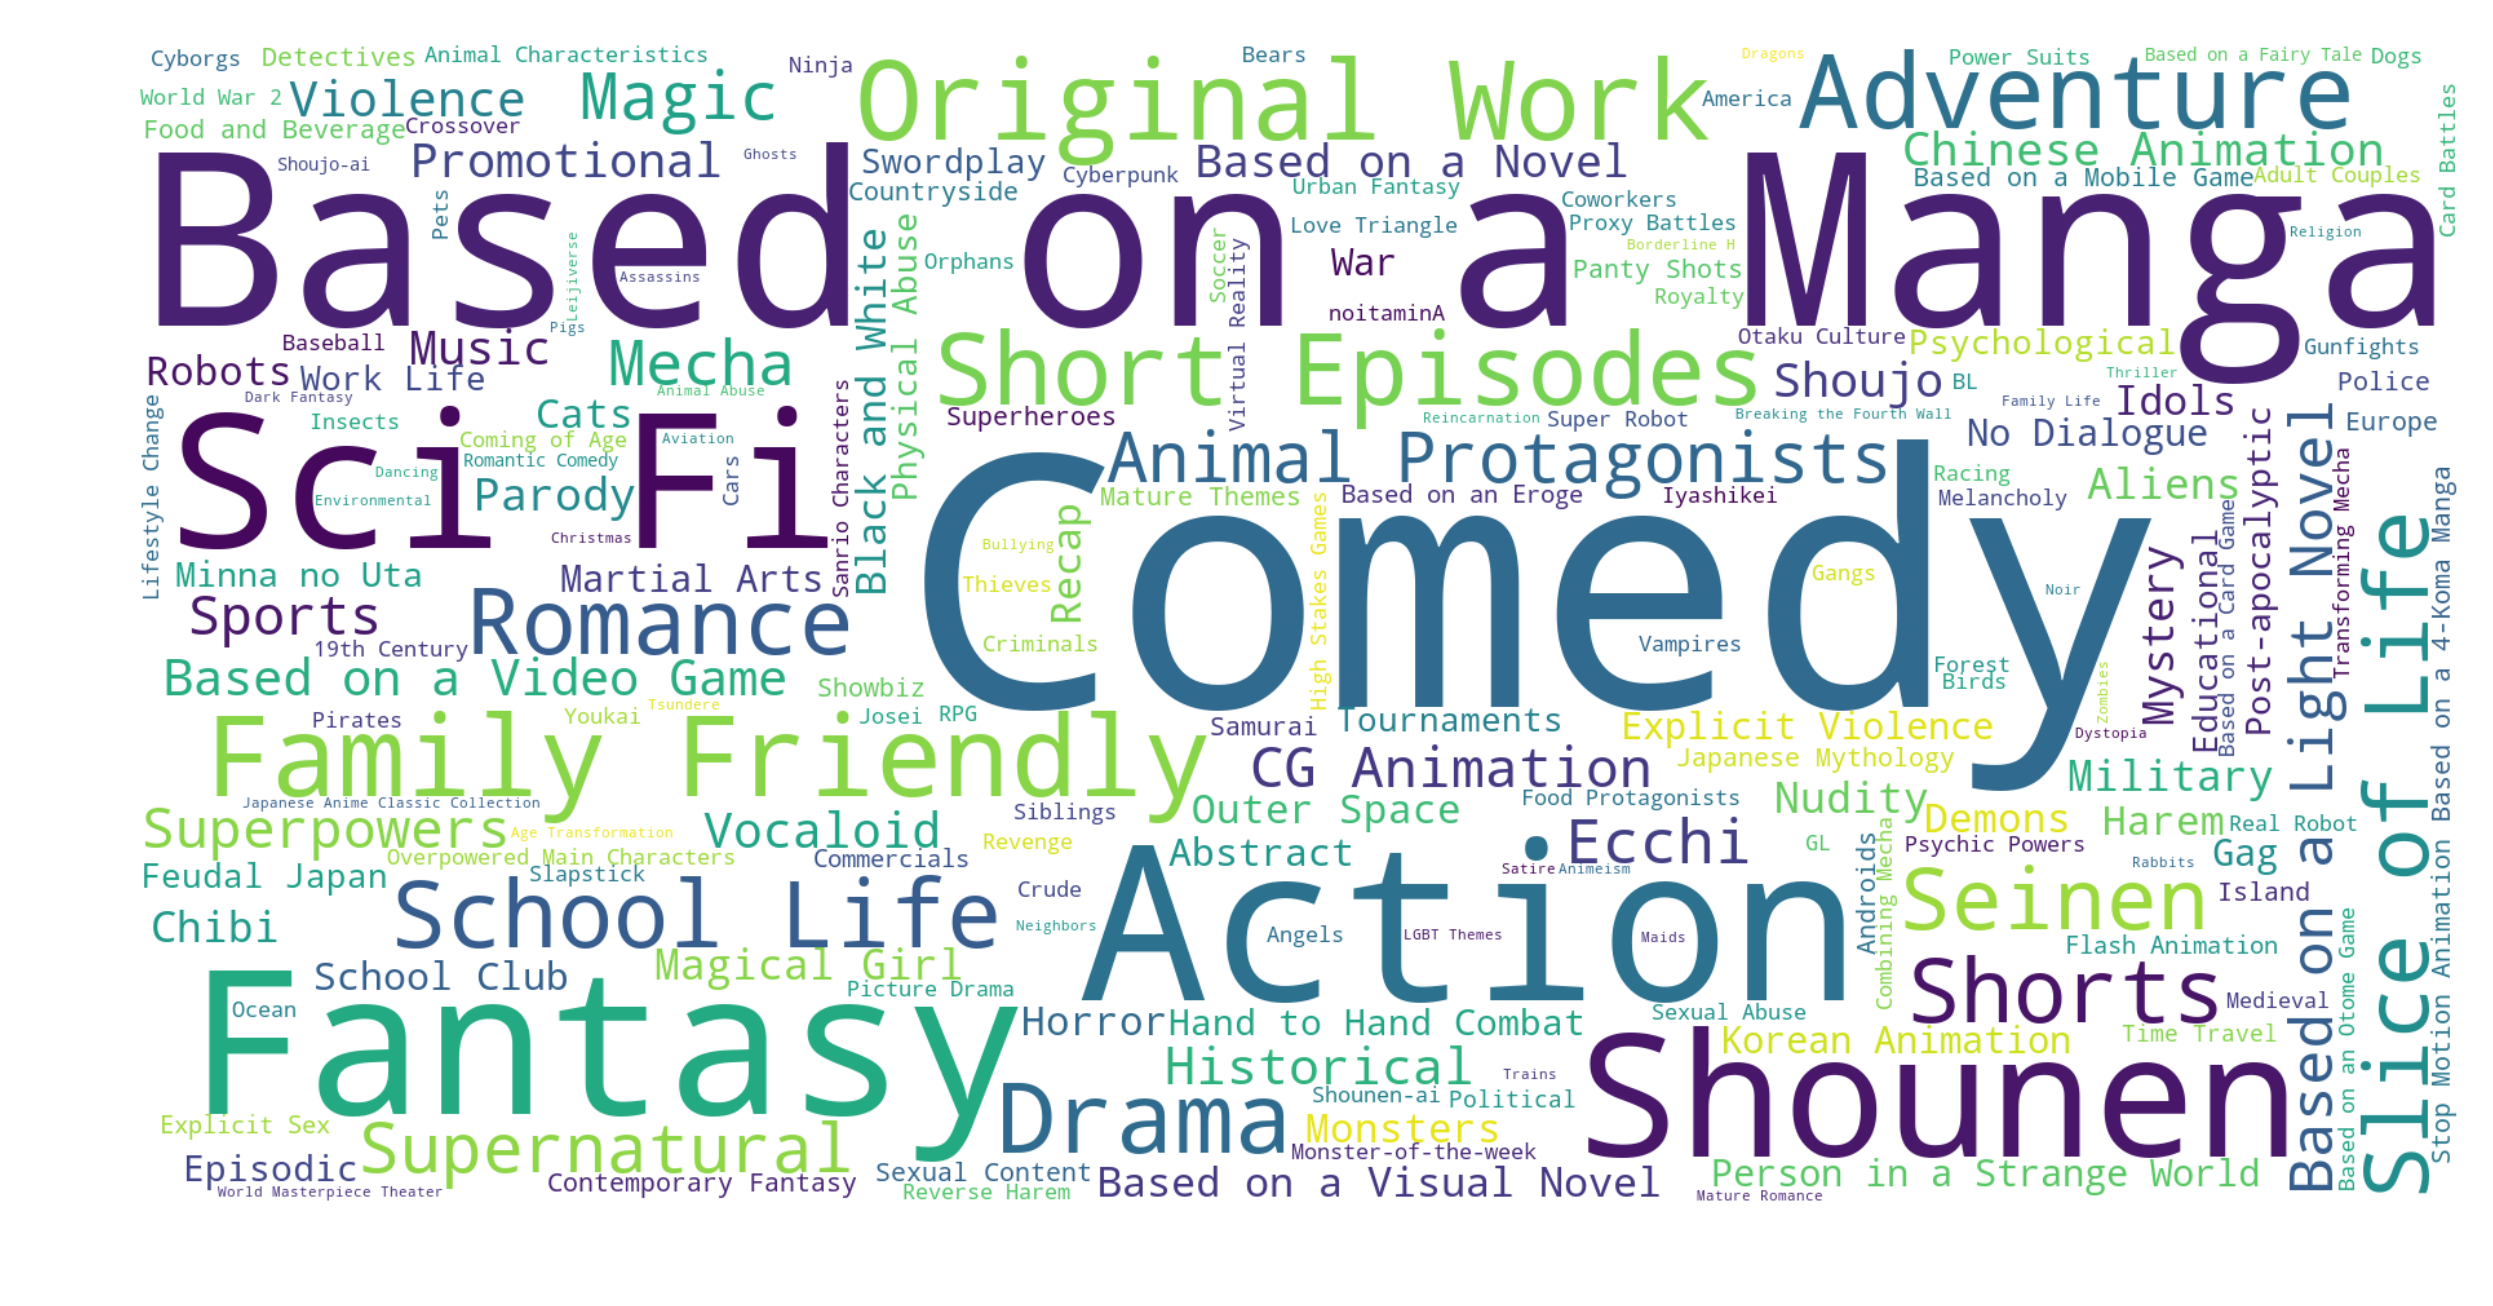

In [91]:
wordcount = pd.Series(all_tags_df['Count'].values,index=all_tags_df['Tags']).to_dict()

from wordcloud import WordCloud
wc = WordCloud(background_color="white", width=1800, height=900).generate_from_frequencies(wordcount)
plt.figure(figsize=(10,12),dpi=300)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('images/not_top_tags_wordcloud.png')

#### Plot relationship between movie duration and rating

In [21]:
df

Rating    Votes                                              Title  \
0       9.410  73986.0                   Fullmetal Alchemist: Brotherhood   
1       9.356  29247.0                                         your name.   
2       9.334  19592.0                                     A Silent Voice   
3       9.320  11195.0  Haikyuu!! Karasuno High School vs Shiratorizaw...   
4       9.296  18788.0                                 My Hero Academia 3   
5       9.288   2939.0                                  Mob Psycho 100 II   
6       9.274  15322.0                            Haikyuu!! Second Season   
7       9.266   5375.0        Gintama Kanketsu-hen: Yorozuya yo Eien Nare   
8       9.264  29623.0                                 My Hero Academia 2   
9       9.262   6192.0                                     Gintama (2015)   
10      9.256  42599.0                                        Steins;Gate   
11      9.256  35732.0                             Hunter x Hunter (2011)   
12      9.248   1248.0              Gintama.: Shirogane no Tamashii-hen 2   
13      9.246   4144.0                             The Promised Neverland   
14      9.240  59301.0            Code Geass: Lelouch of the Rebellion R2   
15      9.228   2430.0              March Comes in like a Lion 2nd Season   
16      9.222   3497.0                                           Gintama.   
17      9.218   5109.0                      Mushishi Zoku Shou 2nd Season   
18      9.210   1803.0                Gintama.: Shirogane no Tamashii-hen   
19      9.200   9542.0                                           Gintama'   
20      9.198   7238.0                                Gintama': Enchousen   
21      9.196  48807.0                                      One-Punch Man   
22      9.196  38709.0                                Clannad After Story   
23      9.192   2718.0                            Natsume Yuujinchou Roku   
24      9.184   6015.0                                 Mushishi Zoku Shou   
25      9.178  10098.0                                      Made in Abyss   
26      9.176  21464.0                                      Wolf Children   
27      9.164  71965.0                                      Spirited Away   
28      9.162   1359.0                        I Want to Eat Your Pancreas   
29      9.158   5336.0                      The Rising of the Shield Hero   
...       ...      ...                                                ...   
13080     NaN      NaN                                     Kamiusagi Rope   
13081     NaN      NaN  Kamaishi no "Kiseki": Inochi wo Mamoru Tokubet...   
13082     NaN      NaN                          Kakusansei Million Arthur   
13083     NaN      NaN                            Kairisei Million Arthur   
13084     NaN      NaN                                    Kairaku no Sono   
13085     NaN      NaN                              Kaisoku Tokyo: Kaijuu   
13086     NaN      NaN                                        Kaguya-hime   
13087     NaN      NaN                    K: Missing Kings - Manner Movie   
13088     NaN      NaN                 Junkers Come Here: Memories of You   
13089     NaN      NaN                      JR Nishi Nihon: Summer Train!   
13090     NaN      NaN                                      Joubuna Tire!   
13091     NaN      NaN                          Ai Kido: Joki Joki Tailor   
13092     NaN      NaN                           Umineco Sounds: Jirijiri   
13093     NaN      NaN                           Chuan Zi: Jin Sheng Yuan   
13094     NaN      NaN                            SPICA: Special Nu World   
13095     NaN      NaN                                Itsumo Kokoro ni Ho   
13096     NaN      NaN                                             Sora e   
13097     NaN      NaN                                         OOIOO: SOL   
13098     NaN      NaN                               Inferno Cop Specials   
13099     NaN      NaN              Indie Anibox: Selma Danbaekjil Coffee   
131

In [22]:
df.corr()

Rating     Votes  Episodes  Duration
Rating    1.000000  0.405017  0.043777  0.474890
Votes     0.405017  1.000000  0.082934  0.310390
Episodes  0.043777  0.082934  1.000000 -0.062432
Duration  0.474890  0.310390 -0.062432  1.000000

In [25]:
def labelsFromBins(bins, left='[', sep=',', right=')'):
    labels = []
    for i in range(len(bins) - 1):
        label = left + str(bins[i]) + sep + str(bins[i + 1]) + right
        labels.append(label)
    return labels

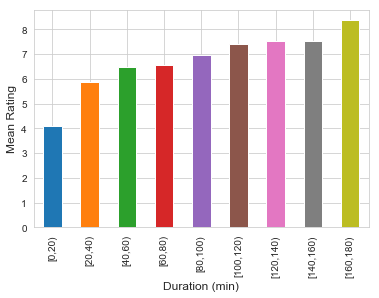

In [26]:
bins = range(0, 200, 20)
def durSplitter(df, ind):
    if df.loc[ind, 'Duration'] == np.NaN:
        return 'Null'
    for i in bins:
        if df.loc[ind, 'Duration'] >= i and df.loc[ind, 'Duration'] < (i + 20):
            return '[' + str(i) + ',' + str(i + 20) + ')'


ax = df.loc[df['Format'] == 'Movie'].groupby(lambda x: durSplitter(df, x))['Rating'].mean().sort_values().plot(kind='bar')
ax.set_xlabel('Duration (min)', fontsize=12)
ax.set_ylabel('Mean Rating', fontsize=12)
_ = ax.set_xticklabels(labelsFromBins(bins))

### 2. How does the number of episodes affect rating?

In [59]:
df.loc[df['Format'] == 'TV'].corr()

Rating     Votes  Episodes  Duration
Rating    1.000000  0.471530 -0.027271  0.253405
Votes     0.471530  1.000000  0.017494  0.198130
Episodes -0.027271  0.017494  1.000000  0.016585
Duration  0.253405  0.198130  0.016585  1.000000

-0.02727106322311943


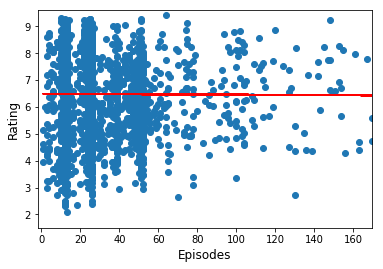

In [60]:
plt.scatter(df.loc[df['Format'] == 'TV', 'Episodes'], df.loc[df['Format'] == 'TV', 'Rating'])
m = df.loc[df['Format'] == 'TV', 'Episodes'].corr(df.loc[df['Format'] == 'TV', 'Rating'])

linear_regressor = LinearRegression()  # create object for the class
mean_dur = df.loc[df['Format'] == 'TV', 'Episodes'].mean()
mean_rat = df.loc[df['Format'] == 'TV', 'Rating'].mean()
linear_regressor.fit(df.loc[df['Format'] == 'TV', 'Episodes'].fillna(value=mean_dur).values.reshape(-1, 1), df.loc[df['Format'] == 'TV', 'Rating'].fillna(value=mean_rat).values.reshape(-1, 1))  # perform linear regression
Y_pred = linear_regressor.predict(df.loc[df['Format'] == 'TV', 'Episodes'].fillna(value=mean_dur).values.reshape(-1, 1))  # make predictions

plt.plot(df.loc[df['Format'] == 'TV', 'Episodes'].fillna(value=mean_dur).values.reshape(-1, 1), Y_pred, color='red')
plt.xlim(-2, 170)
plt.ylim(1.5, 9.6)
plt.xlabel('Episodes', fontsize=12)
plt.ylabel('Rating', fontsize=12)
print(m)

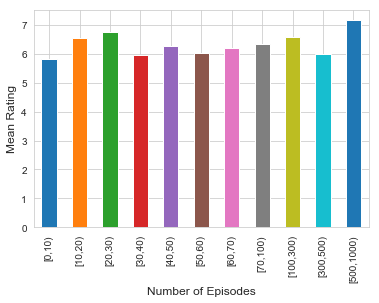

In [27]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100, 300, 500, 1000]
def epsSplitter(df, ind):
    if df.loc[ind, 'Episodes'] == np.NaN:
        return 'Null'
    for i in range(len(bins) - 1):
        if df.loc[ind, 'Episodes'] >= bins[i] and df.loc[ind, 'Episodes'] < bins[i + 1]:
            return bins[i + 1]

ax = df.loc[df['Format'] == 'TV'].groupby(lambda x: epsSplitter(df, x))['Rating'].mean().plot(kind='bar')
ax.set_xlabel('Number of Episodes', fontsize=12)
ax.set_ylabel('Mean Rating', fontsize=12)
_ = ax.set_xticklabels(labelsFromBins(bins))

### Find relationship between tags and rating

In [10]:
def contains (col, elems):
    booleans = []
    for tags in df[col]:
        exists = True
        for item in elems:
            if type(tags) == float:
                exists = False
            elif item not in tags:
                exists = False
        if type(tags) == float:
            booleans.append(False)                   
        elif exists:
            booleans.append(True)
        else:
            booleans.append(False)
    return booleans

In [30]:
#tmp = df.drop(df.index[12681])
#tmp.loc[np.array(contains('Tags', ['Tags'])), 'Tags']

12682    [Action, Fantasy, Shounen, Pirates, Superpower...
12950    [Drama, Sci Fi, Androids, Cafe, Robots, Origin...
Name: Tags, dtype: object

In [13]:
def listTags(tag_col):
    uniq_tags = []
    for tag_row in tag_col:
        if type(tag_row) != float:
            for each in tag_row:
                if each not in uniq_tags:
                    uniq_tags.append(each)
    return uniq_tags

In [14]:
tags = listTags(df['Tags'])

In [15]:
len(tags)

469

In [16]:
tags

['Action',
 'Adventure',
 'Drama',
 'Fantasy',
 'Mystery',
 'Shounen',
 'Conspiracy',
 'Military',
 'Siblings',
 'Violence',
 'Animal Abuse',
 'Based on a Manga',
 'Romance',
 'Body Swapping',
 'Opposites Attract',
 'School Life',
 'Supernatural',
 'Original Work',
 'Melancholy',
 'Bullying',
 'Mature Themes',
 'Suicide',
 'Sports',
 'Animeism',
 'School Club',
 'Tournaments',
 'Volleyball',
 'Comedy',
 'Sci Fi',
 'Superheroes',
 'Superpowers',
 'Psychic Powers',
 'Psychological',
 'Aliens',
 'Feudal Japan',
 'Samurai',
 'Swordplay',
 'Time Travel',
 'Weak to Strong',
 'Breaking the Fourth Wall',
 'Crude',
 'Gag',
 'Parody',
 'Slapstick',
 'LGBT Themes',
 'Thriller',
 'Based on a Visual Novel',
 'Monsters',
 'Horror',
 'Isolated Society',
 'Mind Games',
 'noitaminA',
 'Orphans',
 'Outside World',
 'Mecha',
 'Overpowered Main Characters',
 'Political',
 'Real Robot',
 'Rebellions',
 'Rivalries',
 'Royalty',
 'Terrorism',
 'Seinen',
 'Slice of Life',
 'Board Games',
 'Episodic',
 'Iyashi

In [32]:
%%time
tag_count = {tag: 0 for tag in tags}

for row in df['Tags']:
    if type(row) != float:
        for tag in row:
            tag_count[tag] += 1
            
tag_list = list(tag_count.keys())
count_list = list(tag_count.values())

CPU times: user 17.8 ms, sys: 1.3 ms, total: 19.1 ms
Wall time: 17.9 ms


In [33]:
rating_list = []
for each in tag_list:
    rating_list.append(df.loc[np.array(contains('Tags', [each])), 'Rating'].mean())

In [34]:
tag_df = pd.DataFrame(list(zip(tag_list, rating_list, count_list)), columns=['Tag', 'Rating', 'Count'])

In [35]:
tag_df.loc[tag_df['Count'] > 100].sort_values('Rating', ascending=False).head(40)

Tag    Rating  Count
55   Overpowered Main Characters  7.846911    121
66                     Iyashikei  7.787483    118
32                 Psychological  7.466380    176
83          Contemporary Fantasy  7.413605    159
56                     Political  7.321895    117
121                Urban Fantasy  7.317308    108
96        Based on a Light Novel  7.185417    633
162                     Medieval  7.154571    104
2                          Drama  7.129614   1297
24                   School Club  7.097312    242
76            Japanese Mythology  7.045131    160
170                       Europe  7.040772    143
4                        Mystery  7.037026    351
41                           Gag  7.035379    220
77                        Youkai  7.035200    112
25                   Tournaments  7.010118    180
157                   Detectives  6.990400    151
5                        Shounen  6.977070   1729
36                     Swordplay  6.917918    179
35                       Samurai  6.885054    145
62                        Seinen  6.848096    915
8                       Siblings  6.843077    110
11              Based on a Manga  6.815717   3478
112                          War  6.815136    224
9                       Violence  6.799526    427
288                        Harem  6.797549    259
30                   Superpowers  6.797126    533
16                  Supernatural  6.791816    860
7                       Military  6.786891    318
122            Chinese Animation  6.782163    373
75                   Countryside  6.781055    159
98                      Vampires  6.752429    108
12                       Romance  6.746984   1085
15                   School Life  6.743919   1119
34                  Feudal Japan  6.728025    176
65                      Episodic  6.721979    211
22                        Sports  6.679777    506
72                        Shoujo  6.676197    401
161                     Baseball  6.671313    106
284      Based on a 4-Koma Manga  6.670444    144

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

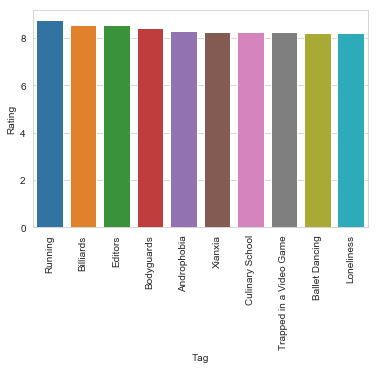

In [36]:
sns.set_style("whitegrid")
tag_rating_graph = sns.barplot(x="Tag", y="Rating", data=tag_df.sort_values('Rating', ascending=False).head(10))
plt.xticks(rotation=90)